In [11]:
import gym
import random
import numpy as np
import matplotlib.pyplot as plt

In [12]:
environment = gym.make("FrozenLake-v1", is_slippery = False, render_mode = "ansi")

In [13]:
environment.reset()

(0, {'prob': 1})

In [14]:
print(environment.render())


SFFF
FHFH
FFFH
HFFG



SFFF
FHFH
FFFH
HFFG

S:START(BAŞLANGIÇ), G:GOAL(HEDEF), F:FROZEN(DONMUŞ), H:HOLE(DELİK)

0:left, 1:down, 2:right, 3:up

In [15]:
nb_states = environment.observation_space.n
nb_states

16

In [16]:
nb_actions = environment.action_space.n
nb_actions

4

In [17]:
# q table: state(16) * actions (4)
q_table = np.zeros((nb_states,nb_actions))
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [18]:
#hyperparameter
episodes = 1000 #total number of episodes
alpha =0.5 #learning rate
gamma = 0.9 #discount factor
outcomes = [] # list of outcomes to plot

In [20]:
#training 
for _ in range(episodes):
    state,_= environment.reset()
    done = False
    outcomes.append("Failure")
    while not done:
        #select action
        if np.max(q_table[state]>0):
            action = np.argmax(q_table[state])
        else:
            action = environment.action_space.sample()

        #implement action
        new_state, reward, done, info, _ = environment.step(action)

        #updatin q table,Q(s,a)
        q_table[state,action] = q_table[state,action] + alpha*(reward + gamma*np.max(q_table[new_state]) - q_table[state,action])

        #update state
        state = new_state
        if reward:
            outcomes[-1] = "Success"

In [21]:
q_table

array([[0.       , 0.59049  , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.6561   , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.2784375, 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.729    , 0.       ],
       [0.       , 0.       , 0.81     , 0.       ],
       [0.       , 0.9      , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 1.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       ]])

<BarContainer object of 1001 artists>

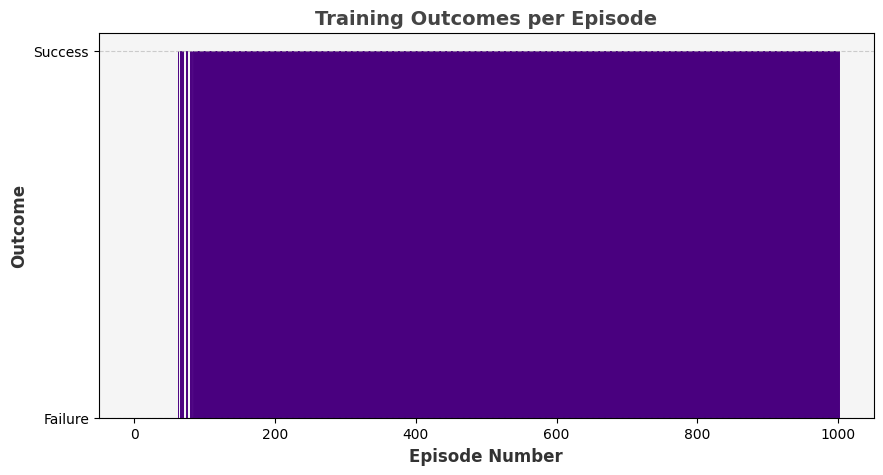

In [22]:
plt.figure(figsize=(10, 5))  
plt.xlabel("Episode Number", fontsize=12, fontweight="bold", color="#333")
plt.ylabel("Outcome", fontsize=12, fontweight="bold", color="#333")
plt.title("Training Outcomes per Episode", fontsize=14, fontweight="bold", color="#444")

ax = plt.gca()
ax.set_facecolor("#f5f5f5")  # Let's make the background color more pleasant
plt.grid(axis="y", linestyle="--", alpha=0.6)  # add a grid along the Y axis

# Çubukları görsel olarak daha hoş hale getirelim
plt.bar(range(len(outcomes)), outcomes, 
        color="black", 
        edgecolor="indigo", 
        linewidth=0.7, 
        width=1)

In [23]:
# How many episodes have been completed successfully?
successful_episodes = outcomes.count("Success")
total_episodes = len(outcomes)

# In which episode did the first success take place?
first_success_episode = outcomes.index("Success") if "Success" in outcomes else None

#Percentage of success
success_rate = (successful_episodes / total_episodes) * 100

print(f"Total {successful_episodes} episode completed successfully.")
print(f"Success rate: %{success_rate:.2f}")

if first_success_episode is not None:
    print(f"The first success occurred in episode {first_success_episode}.")
else:
    print("No success has been achieved yet.")

Total 923 episode completed successfully.
Success rate: %92.21
The first success occurred in episode 62.
